In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
import re

Using TensorFlow backend.


In [2]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [3]:
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\runtimes_final_npb_mg.csv')

In [4]:
df.head()

,sys,sysname,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,...,l3_size,mem-size,mem-type,mem_clock,num-cpus,bus_speed,PS,executable,no_of_procs,runtime
0,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,B,npb_mg.B.x_1,1,5.48
1,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,B,npb_mg.B.x_2,2,5.77
2,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,B,npb_mg.B.x_3,3,5.52
3,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,B,npb_mg.B.x_4,4,6.40
4,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,X86_64,8,64,1,32,4,...,6144,4,DDR3,1600,4,4096.0,B,npb_mg.B.x_5,5,6.55


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 26 columns):
sys                      108 non-null object
sysname                  108 non-null object
arch                     108 non-null object
cpu-clock                108 non-null float64
isa                      108 non-null object
l1d_assoc                108 non-null int64
l1d_cache_lines          108 non-null int64
l1d_shared_by_threads    108 non-null int64
l1d_size                 108 non-null int64
l2_assoc                 108 non-null int64
l2_cache_lines           108 non-null int64
l2_shared_by_threads     108 non-null int64
l2_size                  108 non-null int64
l3_assoc                 108 non-null int64
l3_cache_lines           108 non-null int64
l3_shared_by_threads     108 non-null int64
l3_size                  108 non-null int64
mem-size                 108 non-null int64
mem-type                 108 non-null object
mem_clock                108 non-null int64
num-cpus

In [6]:
df.columns, len(df.columns)

(Index(['sys', 'sysname', 'arch', 'cpu-clock', 'isa', 'l1d_assoc',
        'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size', 'l2_assoc',
        'l2_cache_lines', 'l2_shared_by_threads', 'l2_size', 'l3_assoc',
        'l3_cache_lines', 'l3_shared_by_threads', 'l3_size', 'mem-size',
        'mem-type', 'mem_clock', 'num-cpus', 'bus_speed', 'PS', 'executable',
        'no_of_procs', 'runtime'],
       dtype='object'), 26)

In [7]:
len(df)

108

In [8]:
import re
st = "qsort20000.dat"
temp = re.findall(r'\d+', st) 
res = list(map(int, temp)) 

# print result 
t = str(res[0])
int(t)

20000

In [9]:
def encode_qsort_PS_col(data):
    for i in range(len(data)):
        st = data[i]
        temp = re.findall(r'\d+', st) 
        res = list(map(int, temp)) 
        x = str(res[0])
        data[i] = int(x)

In [10]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [11]:
# encode_qsort_PS_col(encoded_data_frame['PS'])

In [12]:
encoded_data_frame.head()

,sys,sysname,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,...,mem-size,mem-type_1,mem-type_2,mem_clock,num-cpus,bus_speed,PS,executable,no_of_procs,runtime
0,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,8,64,1,32,4,...,4,1,0,1600,4,4096.0,B,npb_mg.B.x_1,1,5.48
1,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,8,64,1,32,4,...,4,1,0,1600,4,4096.0,B,npb_mg.B.x_2,2,5.77
2,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,8,64,1,32,4,...,4,1,0,1600,4,4096.0,B,npb_mg.B.x_3,3,5.52
3,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,8,64,1,32,4,...,4,1,0,1600,4,4096.0,B,npb_mg.B.x_4,4,6.40
4,akm_desktop,Dell_Optiplex_3040,IntelCorei56500_DDR31600_4GB,3.2,1,8,64,1,32,4,...,4,1,0,1600,4,4096.0,B,npb_mg.B.x_5,5,6.55


In [13]:
encoded_data_frame.columns

Index(['sys', 'sysname', 'arch', 'cpu-clock', 'isa_1', 'l1d_assoc',
       'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size', 'l2_assoc',
       'l2_cache_lines', 'l2_shared_by_threads', 'l2_size', 'l3_assoc',
       'l3_cache_lines', 'l3_shared_by_threads', 'l3_size', 'mem-size',
       'mem-type_1', 'mem-type_2', 'mem_clock', 'num-cpus', 'bus_speed', 'PS',
       'executable', 'no_of_procs', 'runtime'],
      dtype='object')

In [14]:
total_data = encoded_data_frame.drop(columns = ['arch', 'sys', 'sysname', 'executable'])

In [15]:
total_data.columns

Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem_clock', 'num-cpus', 'bus_speed', 'PS', 'no_of_procs',
       'runtime'],
      dtype='object')

In [16]:
total_data = total_data.fillna(0)
temp = total_data
#.drop(columns = 'PS')

In [17]:
X_columns = total_data.drop(columns = ['runtime', 'PS']).columns
X = total_data.drop(columns = ['runtime', 'PS']).to_numpy()
Y = total_data['runtime'].to_numpy()

In [18]:
X_columns

Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem_clock', 'num-cpus', 'bus_speed', 'no_of_procs'],
      dtype='object')

In [19]:
X.shape, Y.shape

((108, 21), (108,))

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((86, 21), (22, 21), (86,), (22,))

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Y_train = scaler.fit_transform(Y_train)
# Y_test = scaler.fit_transform(Y_test)

# Histogram Visualization of Dataset

C:\Users\Rajat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until

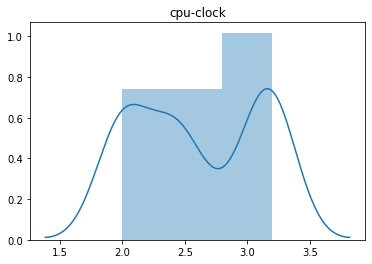

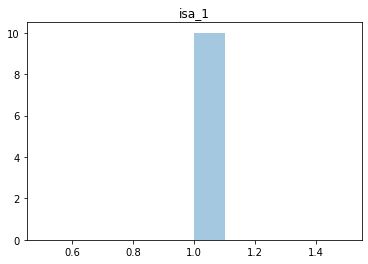

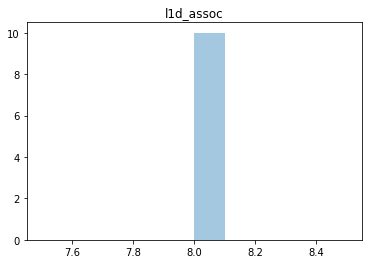

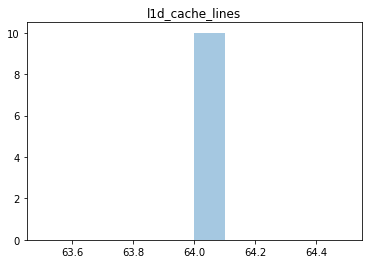

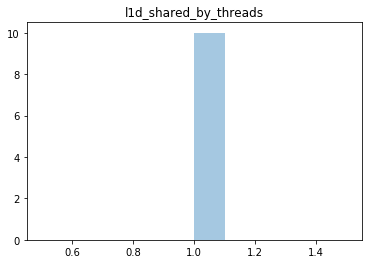

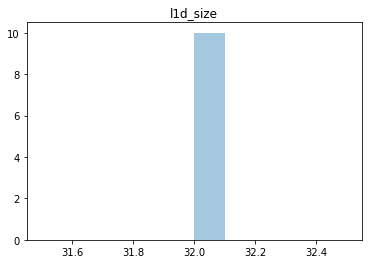

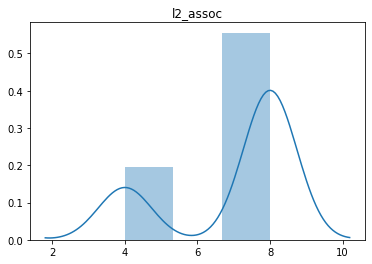

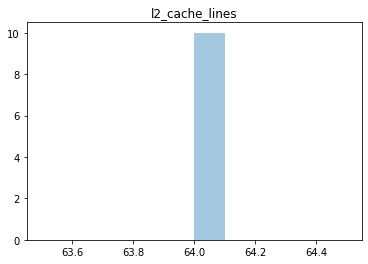

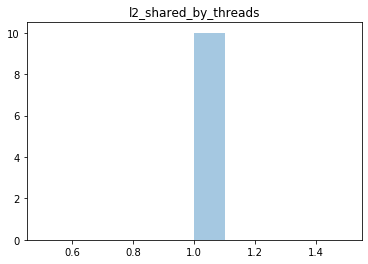

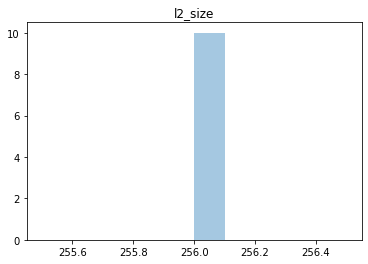

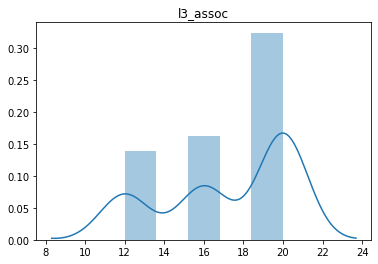

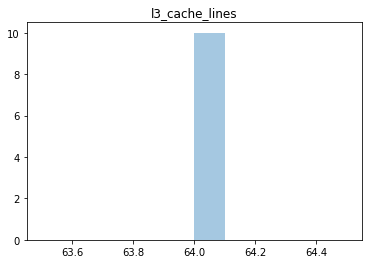

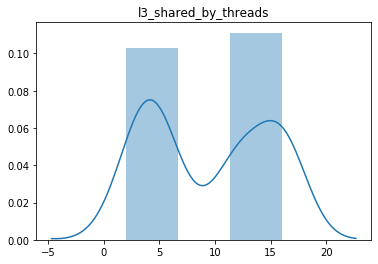

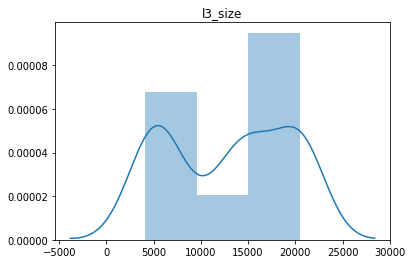

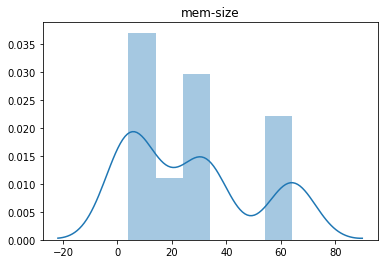

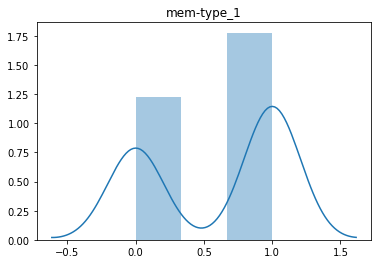

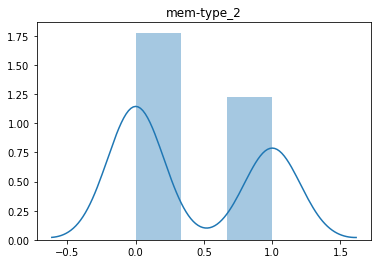

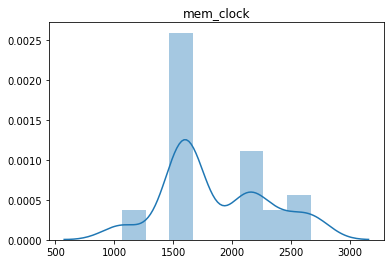

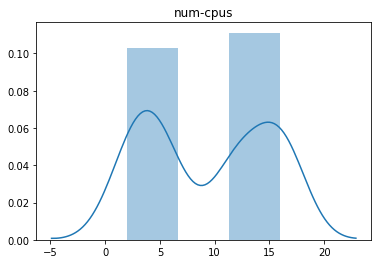

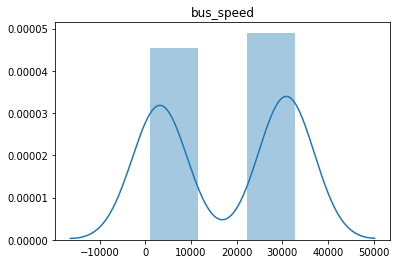

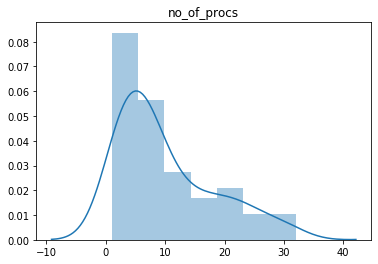

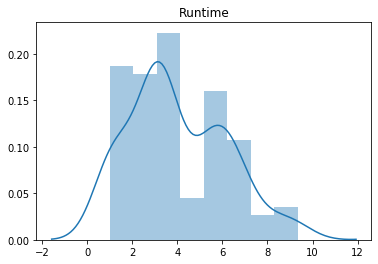

In [23]:
for i in range(X.shape[1]):
    plt.figure()
    plt.title(X_columns[i])
    sns.distplot(X[:,i]) # Also plots Gaussian KDE over data
plt.figure()
plt.title('Runtime')
sns.distplot(Y)

# Understanding Correlations

In [24]:
temp.head(100)

,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,...,l3_size,mem-size,mem-type_1,mem-type_2,mem_clock,num-cpus,bus_speed,PS,no_of_procs,runtime
0,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,1,0,1600,4,4096.0,B,1,5.48
1,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,1,0,1600,4,4096.0,B,2,5.77
2,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,1,0,1600,4,4096.0,B,3,5.52
3,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,1,0,1600,4,4096.0,B,4,6.40
4,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,1,0,1600,4,4096.0,B,5,6.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.2,1,8,64,1,32,8,64,1,256,...,6144,4,1,0,1600,4,1024.0,B,4,5.59
96,3.2,1,8,64,1,32,8,64,1,256,...,6144,4,1,0,1600,4,1024.0,B,5,5.53
97,3.2,1,8,64,1,32,8,64,1,256,...,6144,4,1,0,1600,4,1024.0,B,6,5.55
98,3.2,1,8,64,1,32,8,64,1,256,...,6144,4,1,0,1600,4,1024.0,B,7,5.73


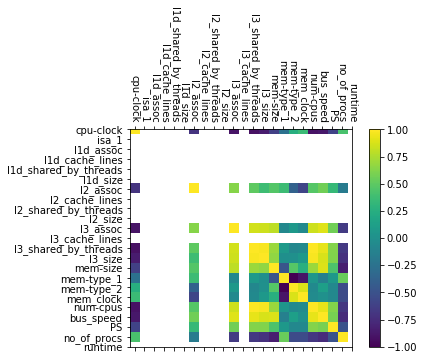

<Figure size 1440x1080 with 0 Axes>

In [25]:
train_data = temp
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,23,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
plt.figure(figsize=(20,15))
plt.show()

In [26]:
correlations

,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,...,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem-type_2,mem_clock,num-cpus,bus_speed,no_of_procs,runtime
cpu-clock,1.000000,NaN,NaN,NaN,NaN,NaN,-0.698656,NaN,NaN,NaN,...,-0.907022,-0.851449,-0.619646,-0.253957,0.253957,0.361571,-0.900083,-0.868996,-0.596623,0.427867
isa_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_assoc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_cache_lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_shared_by_threads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_assoc,-0.698656,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,0.505232,0.377936,0.461877,0.369494,-0.369494,-0.578870,0.473388,0.570154,0.343071,-0.167086
l2_cache_lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_shared_by_threads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

# 1. Support Vector Regressor + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.259, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.238, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.179, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.520, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.482, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.283, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.246, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.148, total=   0.0s
[CV] C

[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.779, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.798, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.942, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.907, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.846, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.923, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.861, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MSE =  2.8452194274292606
R2 score = 0.32952907362358586
Mean Absolute Percentage Error is: 0.5648436660338598
Mean Absolute Error is: 1.3899117142504829


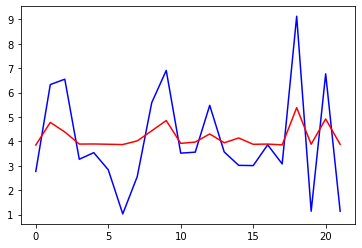

In [28]:
from sklearn.svm import SVR
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              # Regularization parameter. The strength of the regularization is inversely proportional to C. 
              # Must be strictly positive. The penalty is a squared l2 penalty.
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
              # if ‘auto’, uses 1 / n_features.
              
              'kernel': ['rbf']} 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred)) 
print('Mean Absolute Percentage Error is:',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))


# 10 fold cross validation for best SVR

KFold(n_splits=10, random_state=42, shuffle=True)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(98, 21) (10, 21) (98,) (10,)
(98, 21) (10, 21) (98,) (10,)
MSE for 10 folds
 [1.9814515137653494, 3.1078784806527495, 3.6843055848412587, 3.72004813741492, 2.9760169015574984, 2.0209796022095734, 2.875267341848061, 2.303472448240924, 2.4450232903858575, 2.059501999440386]

R2 scores for 10 folds
 [0.42001489863717645, 0.3864469411226189, 0.3353600844114816, 0.37568887396434203, 0.38676090308171374, 0.475187846992413, 0.39066504490730847, 0.37315318191781954, 0.3919613101117344, 0.41752228178307704]

MAPE for 10 folds
 [0.3804760487154025, 0.45362295174141026, 0.6519167586965721, 0.6311694910475966, 0.4802252838867427, 0.4354517882458989, 0.430950111464543, 0.6136207140999177, 0.5487960721056707, 0.36

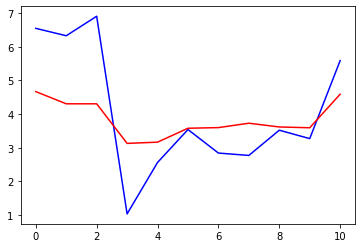

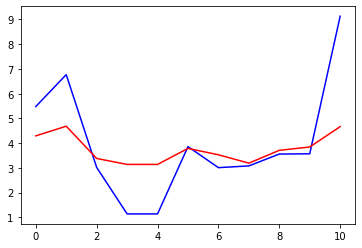

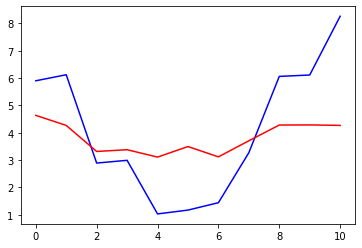

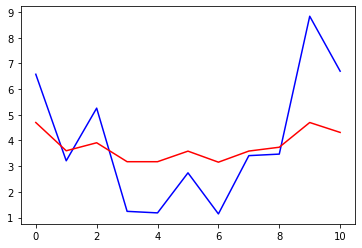

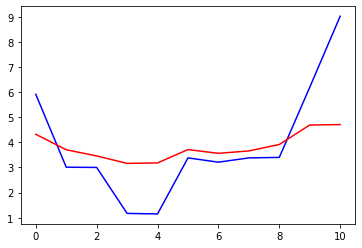

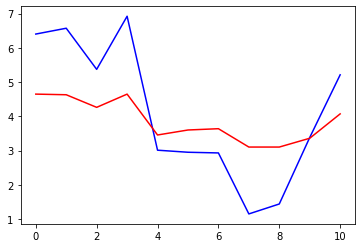

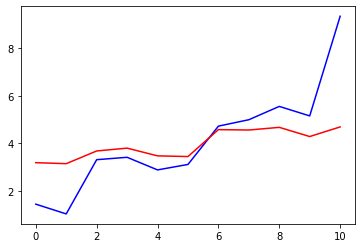

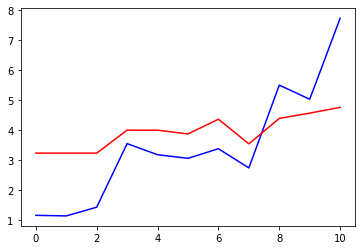

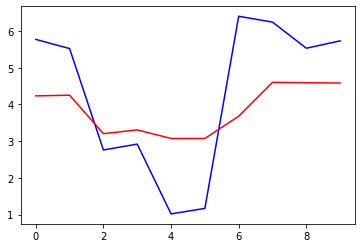

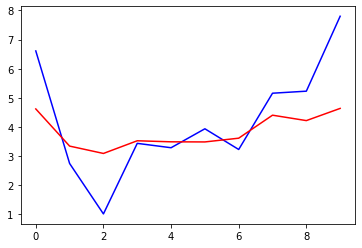

In [29]:
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
from sklearn.svm import SVR
best_svr = SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    best_svr.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = best_svr.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# SVR Analysis

## 0. Our best fit line is the line hyperplane that has maximum number of points. (SVR)
## 1. For linear kernel - Data should be linearly seperable - How to know this? - IF not working well, 
## 2. data must be linearly inseperable? 
## 3. C = 1000,-> Less Regularization was needed
## gamma = 0.1 -> Kernel Coefficient ,  rest default
## 4. SVM performs worse on highly skewed datasets (Can be seen by histograms)
## 5. Logistic regression works well on skewed datasets. (But this is a regression problem and logistic regression works great with classificaton problem)
## 6. How to prove whether given dataset is skewed and not linearly separable?
## 7. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

# 5. Gaussian Process Regressor (Marcov Chain Monte Carlo) + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ..... alpha=1e-10, normalize_y=True, score=-13.668, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ...... alpha=1e-10, normalize_y=True, score=-2.251, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] .... alpha=1e-10, normalize_y=True, score=-513.250, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] .... alpha=1e-10, normalize_y=False, score=-13.663, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ..... alpha=1e-10, normalize_y=False, score=-2.242, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ... alpha=1e-10, normalize_y=False, score=-513.405, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ...... alpha=1e-09, normalize_y=True, score=-3.430, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ...... alpha=1e-09, normalize_y=True, score=-1.969, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] .... alpha=1e-09, normalize_y=True, score=-155.739, total=   0.0s
[CV] a

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.01, 'normalize_y': True}
GaussianProcessRegressor(alpha=0.01, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
MSE =  1.5432778248142063
R2 score = 0.636329309829625

Mean Absolute Percentage Error = 0.4077217004022779
Mean Absolute Error is: 1.008296643495003


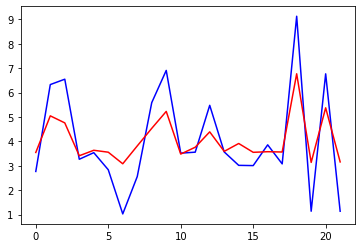

In [30]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0 , 
                               normalize_y= True, copy_X_train=True, random_state= None)
# defining parameter range 
param_grid = {'alpha': [1e-10, 1e-9, 1e-5, 1e-2],  
             'normalize_y' : [True, False],
                         } 
grid = GridSearchCV(gpr, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Gaussian Process Regressor

KFold(n_splits=10, random_state=42, shuffle=True)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(98, 21) (10, 21) (98,) (10,)
(98, 21) (10, 21) (98,) (10,)
MSE for 10 folds
 [0.4642329411240706, 0.2863583046577636, 0.7157418928049505, 0.26391166799998184, 0.1743340376832124, 0.21574294461084556, 0.20283342073450303, 0.5789529272818107, 1.0634457684519854, 0.24481611079275095]

R2 scores for 10 folds
 [0.8641156810836346, 0.9434675406868513, 0.8708818744095721, 0.9557094466155183, 0.9640766664413024, 0.9439754269990533, 0.9570149559605416, 0.8424488208820942, 0.7355378272430606, 0.930759994583132]

MAPE for 10 folds
 [0.15356764758514319, 0.12048435742160066, 0.21546544234972628, 0.11349036655682218, 0.10334087953132944, 0.11230995663061748, 0.12870942331412713, 0.21162339320779672, 0.13891866393

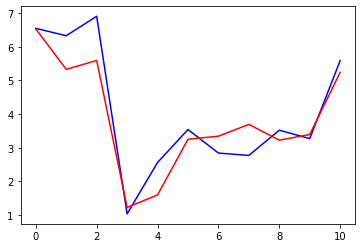

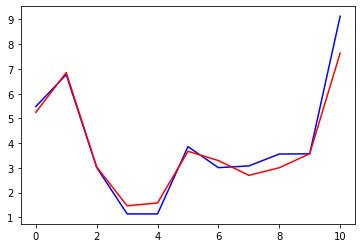

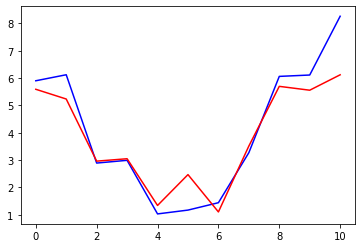

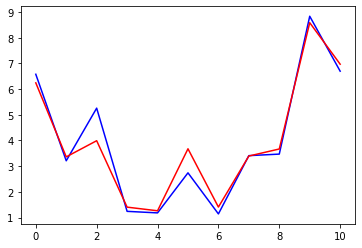

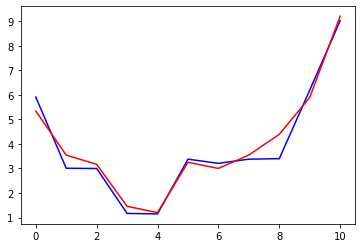

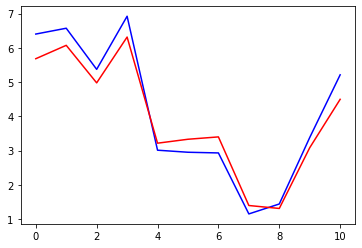

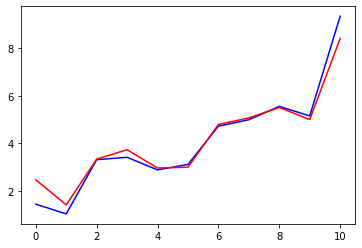

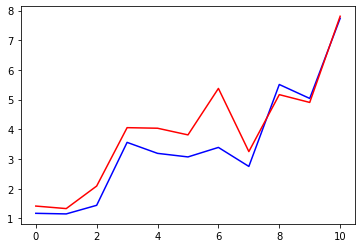

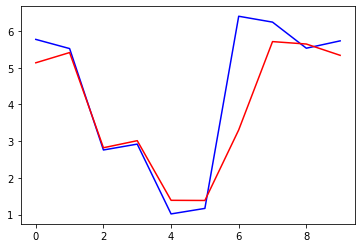

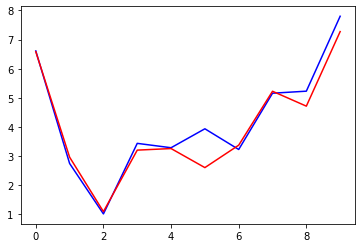

In [31]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr_best = GaussianProcessRegressor(alpha=0.01, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state = 42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    gpr_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = gpr_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 9. Gradient boosting regression + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 336 candidates, totalling 1008 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.754, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.807, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.806, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.816, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.928, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.876, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=0.823, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=0.962, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimato

[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=20, score=0.875, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.768, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.979, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.873, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=100, score=0.766, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=100, score=0.979, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, 

[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=50, score=0.878, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.902, total=   0.2s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.930, total=   0.2s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.870, total=   0.3s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.634, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.679, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5,

[CV]  criterion=mse, loss=lad, max_depth=15, n_estimators=100, score=0.915, total=   0.5s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.623, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.681, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.705, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=20, score=0.773, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=20, score=0.822, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad

[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=10 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=10, score=0.748, total=   0.1s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.773, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.940, total=   0.1s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.864, total=   0.1s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.762, total=   0.3s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.978, total=   0.4s
[CV] criterion=mse, loss=huber, ma

[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=20 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=20, score=0.486, total=   0.0s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=20 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=20, score=0.408, total=   0.0s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.690, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.737, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.680, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=100 .....
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=100, score=0.912, total=   0.1s
[CV] criterion=

[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=20, score=0.518, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.707, total=   0.3s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.800, total=   0.3s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.711, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.914, total=   0.7s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.860, total=   0.7s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  cr

[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.803, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50 ...
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.980, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50 ...
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.885, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.800, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.982, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.885, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=5, n_estimators=10

[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=0.979, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=0.873, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.766, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.979, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.873, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10 
[CV]  criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10, score=0.748, t

[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50, score=0.920, total=   0.1s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50, score=0.902, total=   0.1s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.906, total=   0.2s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.909, total=   0.2s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.889, total=   0.3s
[CV] criterion=friedman_mse, loss=lad, max_depth=7, n_estimators=10 ..
[CV]  criterion=friedman_mse, loss=lad, max_depth=7, n_estimators=10, score=0.634, total=   0.0s
[CV] criterion=friedman_mse, loss=lad, max_depth=7, n_estima

[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.947, total=   0.2s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.916, total=   0.3s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.878, total=   0.5s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.961, total=   0.7s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.915, total=   0.5s
[CV] criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10, score=0.752, total=   0.0s
[CV] criterion=friedman_mse, loss=hu

[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.978, total=   0.4s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.879, total=   0.4s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.760, total=   0.6s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.979, total=   0.6s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.880, total=   0.6s
[CV] criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10, score=0.714, total=   0.1s
[CV] criterion=friedman_mse, loss=huber, ma

[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.690, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.737, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.680, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.912, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.763, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.748, total=   0.1s
[CV] criteri

[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.587, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.518, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.707, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.800, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.711, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100, score=0.914, total=   0.3s
[CV] 

[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.799, total=   0.0s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=20 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.953, total=   0.0s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=20 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.883, total=   0.0s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.790, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.979, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.883, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=100 ...........
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimat

[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=0.988, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=0.870, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.765, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.988, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.870, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=None, n_estimators=10 .........
[CV]  criterion=mae, loss=ls, max_depth=None, n_estimators=10, score=0.751, total=   0.0s
[CV] criterion=mae, loss=ls, max_depth=No

[CV] criterion=mae, loss=lad, max_depth=5, n_estimators=100 ..........
[CV]  criterion=mae, loss=lad, max_depth=5, n_estimators=100, score=0.967, total=   0.5s
[CV] criterion=mae, loss=lad, max_depth=5, n_estimators=100 ..........
[CV]  criterion=mae, loss=lad, max_depth=5, n_estimators=100, score=0.919, total=   0.6s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.729, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.685, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.738, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=20 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=20, score=0.895, total=   0.2s
[CV] criterion=mae, loss=lad, max_depth=7, n

[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.807, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.784, total=   0.0s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.806, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.930, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.872, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=50 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=50, score=0.822, total=   0.2s
[CV] criterion=mae, loss=huber, ma

[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.747, total=   0.7s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=20 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.939, total=   0.8s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=20 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.864, total=   0.7s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.719, total=   1.8s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.979, total=   2.2s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.878, total=   2.3s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=100 .......
[CV]  criterion=mae, loss=hu

[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=20, score=0.491, total=   0.1s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.867, total=   0.3s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.931, total=   0.3s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.841, total=   0.3s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=0.868, total=   0.7s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=0.964, total=   0.7s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterio

[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=50 .....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=50, score=0.970, total=   0.7s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=50 .....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=50, score=0.913, total=   0.5s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.908, total=   1.2s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.975, total=   1.7s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.917, total=   1.3s
[CV] criterion=mae, loss=quantile, max_depth=None, n_estimators=10 ...
[CV]  criterion=mae, loss=quantile, max_depth=None, n_estimators=10, score=0.241, total=   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done 1008 out of 1008 | elapsed:  4.7min finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mae', 'loss': 'lad', 'max_depth': 5, 'n_estimators': 100}
GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE =  0.38325395906809967
R2 score = 0.9096868823203599

Mean Absolute Percentage Error = 0.19327104793143499
Mean Absolute Error is: 0.5218229267260267


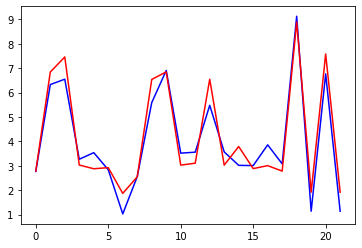

In [32]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
                                         subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                                         min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                         min_impurity_decrease=0.0, min_impurity_split=None, 
                                         init=None, random_state= 42, max_features=None, 
                                         alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                         warm_start=False, validation_fraction=0.1, n_iter_no_change=None, 
                                         tol=0.0001)
# defining parameter range
param_grid = {'n_estimators' : [10, 20, 50, 100],
              
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
             }
'''param_grid = {'n_estimators' : [10, 20, 50, 100],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15 None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 20,50, 100], 
              'warm_start': ['True', 'False'],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001],
              'subsample': [0.2, 0.4, 0.6, 0.8, 1],
              'validation_fraction': [0.2, 0.1, 0.3, 0.4]
             } '''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best GBR

KFold(n_splits=10, random_state=42, shuffle=True)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(97, 21) (11, 21) (97,) (11,)
(98, 21) (10, 21) (98,) (10,)
(98, 21) (10, 21) (98,) (10,)
MSE for 10 folds
 [0.05685300047197573, 0.05652607883705583, 0.09348308144897902, 0.7974832037480097, 0.030919201684566276, 0.13633300088557296, 0.06171447066721761, 0.36154169819232446, 0.5998804418700351, 0.0631662758507738]

R2 scores for 10 folds
 [0.9833587180849763, 0.9888406999203085, 0.9831358756942304, 0.8661636574218038, 0.993628778348485, 0.9645967650328995, 0.9869212912255985, 0.9016132086628792, 0.8508192051182109, 0.9821350267026606]

MAPE for 10 folds
 [0.0525690788386193, 0.04605354288115492, 0.033865190513245186, 0.12408832594115697, 0.03334306175443021, 0.056267710309535944, 0.04212517225182295, 0.09959143936089365, 0.064798

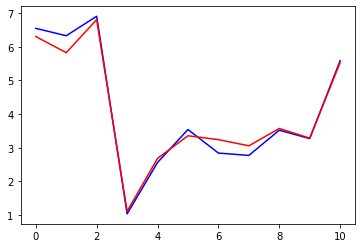

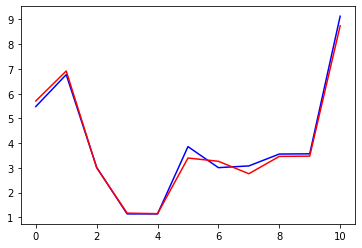

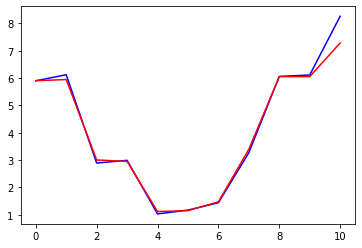

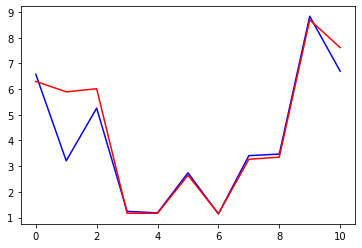

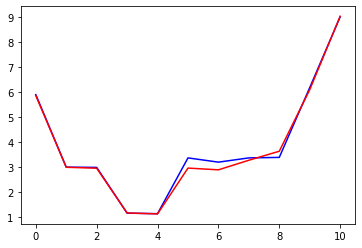

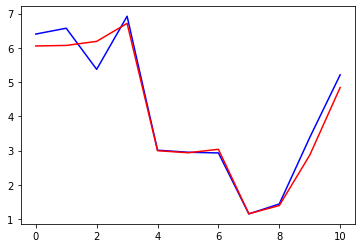

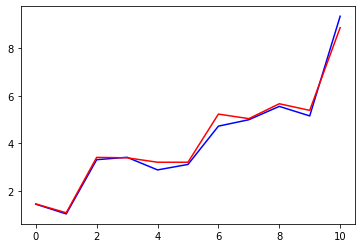

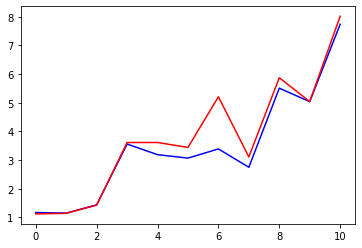

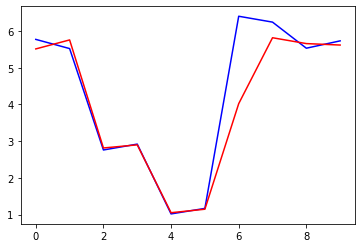

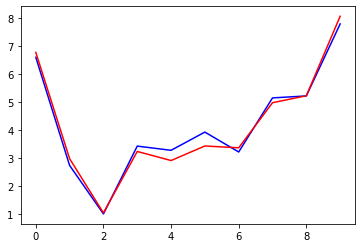

In [33]:
from sklearn import ensemble
reg_best = ensemble.GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 10. XGB Boost + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[11:28:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.340, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[11:28:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.388, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[11:28:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.276, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[11:28:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.776, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[11:28:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.806, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators

[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.778, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................
[11:28:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.811, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................
[11:28:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.810, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................
[11:28:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimator

[11:28:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=20, score=0.810, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[11:28:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.896, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[11:28:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.943, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[11:28:28] WARNING: C:/Jenkins/workspace/xgboo

[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.897, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[11:28:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.970, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[11:28:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.957, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[11:28:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimator

[11:28:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.930, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[11:28:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.892, total=   0.1s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[11:28:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.975, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[11:28:30] WARNING: C:/Jenkins/workspace/xgboos

[CV] learning_rate=0.5, max_depth=10, n_estimators=100 ...............
[11:28:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, score=0.979, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=100 ...............
[11:28:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, score=0.918, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=10 ................
[11:28:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10, score=0.876, total=   0.0s
[CV] learning_rate=0.5, max_depth=15, n_esti

[11:28:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, score=0.220, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[11:28:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-1.687, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[11:28:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-1.971, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[11:28:32] WARNING: C:/Jenkins/workspace/xg

[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-1.687, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=10 ................
[11:28:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-1.971, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=10 ................
[11:28:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-2.872, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=20 ................
[11:28:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_es

[11:28:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=10, score=-2.872, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[11:28:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-1.299, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[11:28:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-1.498, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[11:28:34] WARNING: C:/Jenkins/workspace

[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-2.063, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20 ...............
[11:28:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-2.443, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20 ...............
[11:28:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-3.514, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=50 ...............
[11:28:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, 

[11:28:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=20, score=-3.514, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[11:28:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-1.917, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[11:28:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-2.260, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[11:28:36] WARNING: C:/Jenkins/workspace

[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-1.917, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=50 ..............
[11:28:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-2.260, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=50 ..............
[11:28:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-3.264, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=100 .............
[11:28:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=

[11:28:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=50, score=-3.643, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[11:28:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-2.113, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[11:28:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-2.504, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[11:28:38] WARNING: C:/Jenkins/work

[11:28:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-2.113, total=   0.1s
[CV] learning_rate=0.0001, max_depth=7, n_estimators=100 .............
[11:28:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-2.504, total=   0.1s
[CV] learning_rate=0.0001, max_depth=7, n_estimators=100 .............
[11:28:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-3.599, total=   0.1s
[CV] learning_rate=0.0001, max_depth=10, n_estimators=10 .............
[11:28:39] WARNING: C:/Jenkins/wor

[11:28:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-2.504, total=   0.1s
[CV] learning_rate=0.0001, max_depth=15, n_estimators=100 ............
[11:28:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-3.599, total=   0.1s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   14.4s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[11:28:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 50}
XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
MSE =  0.2761851468494602
R2 score = 0.934917458571245

Mean Absolute Percentage Error = 0.09336435809672756
Mean Absolute Error is: 0.3461660701578314


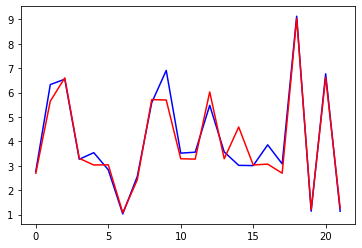

In [34]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg = xgb.XGBRegressor(booster = 'gbtree',validate_parameters = False,  
                objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# defining parameter range 
param_grid = {'n_estimators' : [10, 20, 50, 100], 
              'max_depth': [3,4,5,7,10,15],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001]      
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# # 10 fold cross validation for best XGB 

KFold(n_splits=10, random_state=42, shuffle=True)
(97, 21) (11, 21) (97,) (11,)
[11:29:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(97, 21) (11, 21) (97,) (11,)
[11:29:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(97, 21) (11, 21) (97,) (11,)
[11:29:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(97, 21) (11, 21) (97,) (11,)
[11:29:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(97, 21) (11, 21) (97,) (11,)
[11:29:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

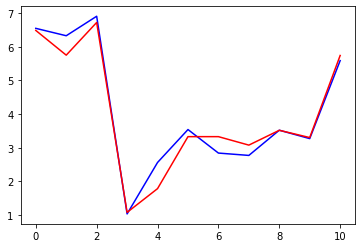

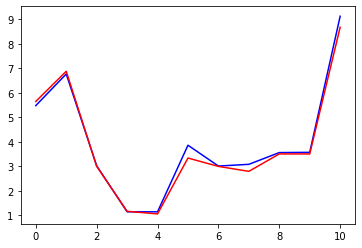

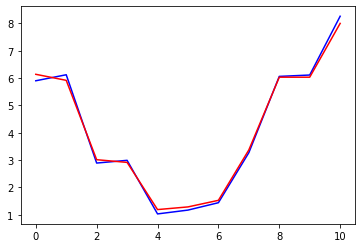

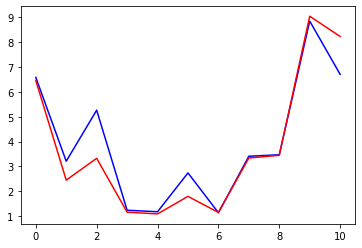

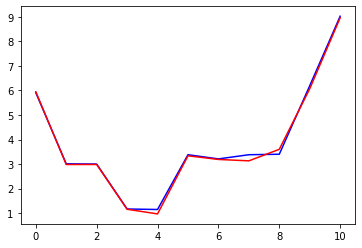

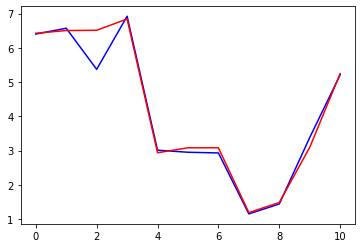

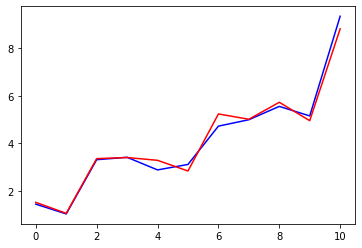

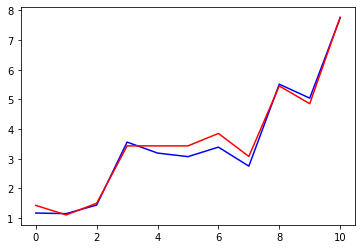

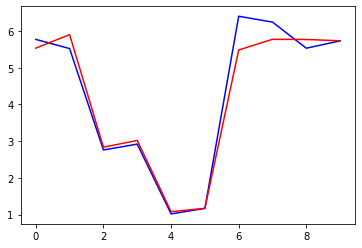

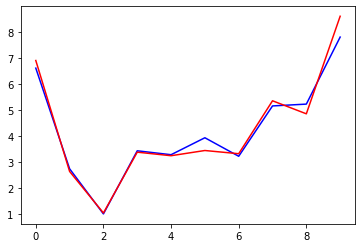

In [35]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg_best = xgb.XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# 11. DNN_1

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               11264     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 11,777
Trainable params: 11,777
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(97, 21) (11, 21) (97,) (11,)
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 475.0269 - mae: 475.0269
Epoch 2/100
 - 0s - loss: 138.2573 - mae: 138.2573
Epoch 3/100
 - 0s - loss: 44.5250 - mae: 44.5250
Epoch 4/100
 - 0s - loss: 84.7438 - mae: 84.7438
Epoch 5/100
 - 0s - loss: 113.5260 - mae: 113.52

Epoch 36/100
 - 0s - loss: 49.7618 - mae: 49.7618
Epoch 37/100
 - 0s - loss: 95.0863 - mae: 95.0863
Epoch 38/100
 - 0s - loss: 34.5674 - mae: 34.5674
Epoch 39/100
 - 0s - loss: 49.5761 - mae: 49.5761
Epoch 40/100
 - 0s - loss: 64.3838 - mae: 64.3838
Epoch 41/100
 - 0s - loss: 46.7587 - mae: 46.7587
Epoch 42/100
 - 0s - loss: 41.0047 - mae: 41.0047
Epoch 43/100
 - 0s - loss: 26.4575 - mae: 26.4575
Epoch 44/100
 - 0s - loss: 58.6295 - mae: 58.6295
Epoch 45/100
 - 0s - loss: 104.7903 - mae: 104.7903
Epoch 46/100
 - 0s - loss: 72.1942 - mae: 72.1942
Epoch 47/100
 - 0s - loss: 67.9186 - mae: 67.9186
Epoch 48/100
 - 0s - loss: 34.7538 - mae: 34.7538
Epoch 49/100
 - 0s - loss: 34.1737 - mae: 34.1738
Epoch 50/100
 - 0s - loss: 86.1996 - mae: 86.1996
Epoch 51/100
 - 0s - loss: 45.4721 - mae: 45.4721
Epoch 52/100
 - 0s - loss: 60.5185 - mae: 60.5185
Epoch 53/100
 - 0s - loss: 58.3660 - mae: 58.3660
Epoch 54/100
 - 0s - loss: 97.7943 - mae: 97.7943
Epoch 55/100
 - 0s - loss: 45.4924 - mae: 45.492

Epoch 98/100
 - 0s - loss: 51.4058 - mae: 51.4058
Epoch 99/100
 - 0s - loss: 48.4058 - mae: 48.4058
Epoch 100/100
 - 0s - loss: 49.7404 - mae: 49.7404
*******************Fold number************************:  4
(97, 21) (11, 21) (97,) (11,)
Epoch 1/100
 - 0s - loss: 58.9009 - mae: 58.9009
Epoch 2/100
 - 0s - loss: 56.8596 - mae: 56.8596
Epoch 3/100
 - 0s - loss: 95.3187 - mae: 95.3187
Epoch 4/100
 - 0s - loss: 90.3898 - mae: 90.3898
Epoch 5/100
 - 0s - loss: 33.7267 - mae: 33.7267
Epoch 6/100
 - 0s - loss: 72.5151 - mae: 72.5151
Epoch 7/100
 - 0s - loss: 33.0801 - mae: 33.0801
Epoch 8/100
 - 0s - loss: 38.7929 - mae: 38.7929
Epoch 9/100
 - 0s - loss: 60.4461 - mae: 60.4461
Epoch 10/100
 - 0s - loss: 30.0443 - mae: 30.0443
Epoch 11/100
 - 0s - loss: 43.4859 - mae: 43.4859
Epoch 12/100
 - 0s - loss: 28.3092 - mae: 28.3092
Epoch 13/100
 - 0s - loss: 23.6359 - mae: 23.6359
Epoch 14/100
 - 0s - loss: 89.0386 - mae: 89.0386
Epoch 15/100
 - 0s - loss: 50.6785 - mae: 50.6785
Epoch 16/100
 - 0s 

Epoch 58/100
 - 0s - loss: 104.2833 - mae: 104.2833
Epoch 59/100
 - 0s - loss: 61.9200 - mae: 61.9200
Epoch 60/100
 - 0s - loss: 54.6501 - mae: 54.6501
Epoch 61/100
 - 0s - loss: 61.5437 - mae: 61.5437
Epoch 62/100
 - 0s - loss: 40.9518 - mae: 40.9518
Epoch 63/100
 - 0s - loss: 33.9608 - mae: 33.9608
Epoch 64/100
 - 0s - loss: 74.0761 - mae: 74.0761
Epoch 65/100
 - 0s - loss: 37.6898 - mae: 37.6898
Epoch 66/100
 - 0s - loss: 44.6846 - mae: 44.6846
Epoch 67/100
 - 0s - loss: 43.6350 - mae: 43.6350
Epoch 68/100
 - 0s - loss: 39.6269 - mae: 39.6269
Epoch 69/100
 - 0s - loss: 37.9462 - mae: 37.9462
Epoch 70/100
 - 0s - loss: 82.4811 - mae: 82.4811
Epoch 71/100
 - 0s - loss: 76.4358 - mae: 76.4358
Epoch 72/100
 - 0s - loss: 72.5156 - mae: 72.5156
Epoch 73/100
 - 0s - loss: 73.4040 - mae: 73.4040
Epoch 74/100
 - 0s - loss: 76.3219 - mae: 76.3219
Epoch 75/100
 - 0s - loss: 31.9502 - mae: 31.9502
Epoch 76/100
 - 0s - loss: 31.2641 - mae: 31.2641
Epoch 77/100
 - 0s - loss: 26.2387 - mae: 26.238

Epoch 19/100
 - 0s - loss: 62.1637 - mae: 62.1637
Epoch 20/100
 - 0s - loss: 55.7030 - mae: 55.7030
Epoch 21/100
 - 0s - loss: 56.8316 - mae: 56.8316
Epoch 22/100
 - 0s - loss: 18.6092 - mae: 18.6092
Epoch 23/100
 - 0s - loss: 23.9355 - mae: 23.9355
Epoch 24/100
 - 0s - loss: 21.2475 - mae: 21.2475
Epoch 25/100
 - 0s - loss: 24.1529 - mae: 24.1529
Epoch 26/100
 - 0s - loss: 65.2171 - mae: 65.2171
Epoch 27/100
 - 0s - loss: 43.5816 - mae: 43.5816
Epoch 28/100
 - 0s - loss: 28.7454 - mae: 28.7454
Epoch 29/100
 - 0s - loss: 40.6870 - mae: 40.6870
Epoch 30/100
 - 0s - loss: 33.5490 - mae: 33.5490
Epoch 31/100
 - 0s - loss: 16.3369 - mae: 16.3369
Epoch 32/100
 - 0s - loss: 33.1115 - mae: 33.1115
Epoch 33/100
 - 0s - loss: 25.6888 - mae: 25.6888
Epoch 34/100
 - 0s - loss: 28.2568 - mae: 28.2568
Epoch 35/100
 - 0s - loss: 30.3198 - mae: 30.3198
Epoch 36/100
 - 0s - loss: 21.7304 - mae: 21.7304
Epoch 37/100
 - 0s - loss: 33.9383 - mae: 33.9383
Epoch 38/100
 - 0s - loss: 40.1168 - mae: 40.1168


Epoch 81/100
 - 0s - loss: 49.9002 - mae: 49.9002
Epoch 82/100
 - 0s - loss: 98.5592 - mae: 98.5592
Epoch 83/100
 - 0s - loss: 74.1009 - mae: 74.1009
Epoch 84/100
 - 0s - loss: 63.4426 - mae: 63.4426
Epoch 85/100
 - 0s - loss: 45.8131 - mae: 45.8131
Epoch 86/100
 - 0s - loss: 16.1228 - mae: 16.1228
Epoch 87/100
 - 0s - loss: 20.0458 - mae: 20.0458
Epoch 88/100
 - 0s - loss: 33.7436 - mae: 33.7436
Epoch 89/100
 - 0s - loss: 61.8185 - mae: 61.8185
Epoch 90/100
 - 0s - loss: 39.6360 - mae: 39.6360
Epoch 91/100
 - 0s - loss: 23.2586 - mae: 23.2586
Epoch 92/100
 - 0s - loss: 17.1805 - mae: 17.1805
Epoch 93/100
 - 0s - loss: 22.0484 - mae: 22.0484
Epoch 94/100
 - 0s - loss: 18.9733 - mae: 18.9733
Epoch 95/100
 - 0s - loss: 14.2960 - mae: 14.2960
Epoch 96/100
 - 0s - loss: 14.6741 - mae: 14.6741
Epoch 97/100
 - 0s - loss: 28.1262 - mae: 28.1262
Epoch 98/100
 - 0s - loss: 39.9344 - mae: 39.9344
Epoch 99/100
 - 0s - loss: 29.3559 - mae: 29.3559
Epoch 100/100
 - 0s - loss: 15.7686 - mae: 15.7686

Epoch 42/100
 - 0s - loss: 21.9547 - mae: 21.9547
Epoch 43/100
 - 0s - loss: 31.6691 - mae: 31.6691
Epoch 44/100
 - 0s - loss: 62.4638 - mae: 62.4637
Epoch 45/100
 - 0s - loss: 43.8691 - mae: 43.8691
Epoch 46/100
 - 0s - loss: 19.0616 - mae: 19.0616
Epoch 47/100
 - 0s - loss: 13.4413 - mae: 13.4413
Epoch 48/100
 - 0s - loss: 38.0605 - mae: 38.0605
Epoch 49/100
 - 0s - loss: 44.0162 - mae: 44.0162
Epoch 50/100
 - 0s - loss: 45.7983 - mae: 45.7983
Epoch 51/100
 - 0s - loss: 29.2445 - mae: 29.2445
Epoch 52/100
 - 0s - loss: 31.9189 - mae: 31.9189
Epoch 53/100
 - 0s - loss: 59.6639 - mae: 59.6639
Epoch 54/100
 - 0s - loss: 44.3905 - mae: 44.3905
Epoch 55/100
 - 0s - loss: 62.0564 - mae: 62.0564
Epoch 56/100
 - 0s - loss: 75.8725 - mae: 75.8725
Epoch 57/100
 - 0s - loss: 40.4094 - mae: 40.4094
Epoch 58/100
 - 0s - loss: 16.7489 - mae: 16.7489
Epoch 59/100
 - 0s - loss: 44.8930 - mae: 44.8930
Epoch 60/100
 - 0s - loss: 45.0336 - mae: 45.0336
Epoch 61/100
 - 0s - loss: 50.9492 - mae: 50.9492


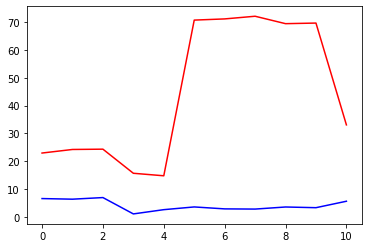

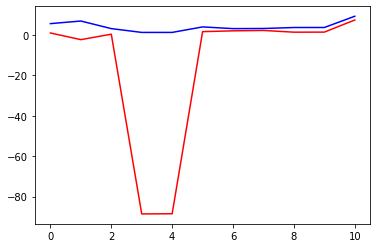

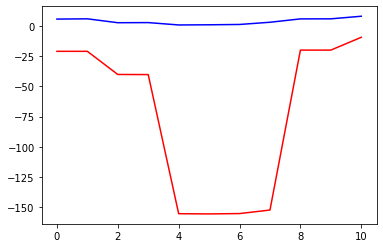

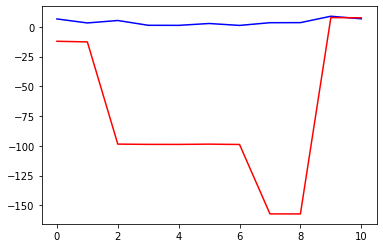

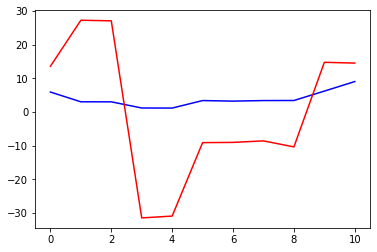

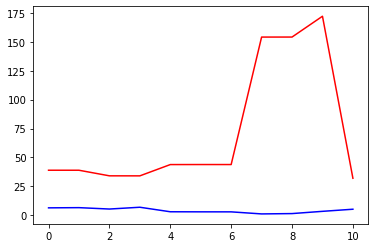

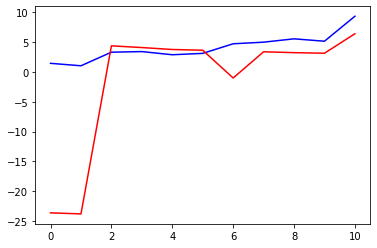

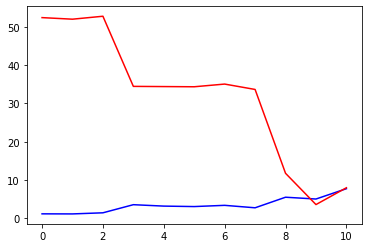

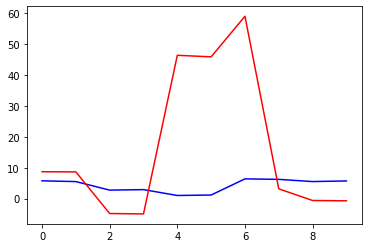

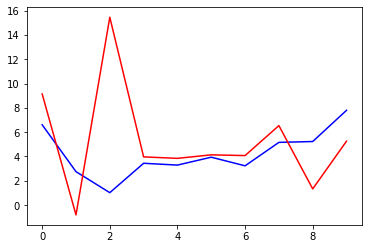

In [36]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=21, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in cv.split(X):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_2

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               11264     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 537,089
Trainable params: 537,089
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(97, 21) (11, 21) (97,) (11,)
Epoch 1/100
 - 2s - loss: 1860.8410 - mae: 1860.8408
Epoch 2/100
 - 1s - loss: 721.9478 - mae: 721.947

Epoch 48/100
 - 0s - loss: 0.5363 - mae: 0.5363
Epoch 49/100
 - 0s - loss: 0.6567 - mae: 0.6567
Epoch 50/100
 - 0s - loss: 0.9448 - mae: 0.9448
Epoch 51/100
 - 0s - loss: 0.5759 - mae: 0.5759
Epoch 52/100
 - 0s - loss: 0.6384 - mae: 0.6384
Epoch 53/100
 - 0s - loss: 0.4880 - mae: 0.4880
Epoch 54/100
 - 0s - loss: 0.5144 - mae: 0.5144
Epoch 55/100
 - 0s - loss: 0.6764 - mae: 0.6764
Epoch 56/100
 - 0s - loss: 0.7454 - mae: 0.7454
Epoch 57/100
 - 0s - loss: 0.9356 - mae: 0.9356
Epoch 58/100
 - 0s - loss: 0.9222 - mae: 0.9222
Epoch 59/100
 - 0s - loss: 0.6945 - mae: 0.6945
Epoch 60/100
 - 0s - loss: 0.8046 - mae: 0.8046
Epoch 61/100
 - 0s - loss: 0.6036 - mae: 0.6036
Epoch 62/100
 - 0s - loss: 0.6835 - mae: 0.6835
Epoch 63/100
 - 0s - loss: 0.7657 - mae: 0.7657
Epoch 64/100
 - 0s - loss: 0.8338 - mae: 0.8338
Epoch 65/100
 - 0s - loss: 0.8012 - mae: 0.8012
Epoch 66/100
 - 0s - loss: 0.5824 - mae: 0.5824
Epoch 67/100
 - 0s - loss: 0.6700 - mae: 0.6700
Epoch 68/100
 - 0s - loss: 0.7938 - mae:

Epoch 16/100
 - 0s - loss: 0.8613 - mae: 0.8613
Epoch 17/100
 - 0s - loss: 0.8953 - mae: 0.8953
Epoch 18/100
 - 0s - loss: 0.6898 - mae: 0.6898
Epoch 19/100
 - 0s - loss: 0.6302 - mae: 0.6302
Epoch 20/100
 - 0s - loss: 0.6884 - mae: 0.6884
Epoch 21/100
 - 0s - loss: 0.6953 - mae: 0.6953
Epoch 22/100
 - 0s - loss: 1.1375 - mae: 1.1375
Epoch 23/100
 - 0s - loss: 0.8429 - mae: 0.8429
Epoch 24/100
 - 0s - loss: 0.7425 - mae: 0.7425
Epoch 25/100
 - 0s - loss: 0.7359 - mae: 0.7359
Epoch 26/100
 - 0s - loss: 0.9225 - mae: 0.9225
Epoch 27/100
 - 0s - loss: 0.8532 - mae: 0.8532
Epoch 28/100
 - 0s - loss: 0.7420 - mae: 0.7420
Epoch 29/100
 - 0s - loss: 0.9926 - mae: 0.9926
Epoch 30/100
 - 0s - loss: 0.7499 - mae: 0.7499
Epoch 31/100
 - 0s - loss: 0.9506 - mae: 0.9506
Epoch 32/100
 - 0s - loss: 0.7920 - mae: 0.7920
Epoch 33/100
 - 0s - loss: 0.7767 - mae: 0.7767
Epoch 34/100
 - 0s - loss: 0.7050 - mae: 0.7050
Epoch 35/100
 - 0s - loss: 0.7764 - mae: 0.7764
Epoch 36/100
 - 0s - loss: 0.7203 - mae:

Epoch 85/100
 - 0s - loss: 0.8585 - mae: 0.8585
Epoch 86/100
 - 0s - loss: 0.7241 - mae: 0.7241
Epoch 87/100
 - 0s - loss: 0.7773 - mae: 0.7773
Epoch 88/100
 - 0s - loss: 0.7652 - mae: 0.7652
Epoch 89/100
 - 0s - loss: 0.7887 - mae: 0.7887
Epoch 90/100
 - 0s - loss: 0.7215 - mae: 0.7215
Epoch 91/100
 - 0s - loss: 0.9333 - mae: 0.9333
Epoch 92/100
 - 0s - loss: 0.8668 - mae: 0.8668
Epoch 93/100
 - 0s - loss: 0.7857 - mae: 0.7857
Epoch 94/100
 - 0s - loss: 0.9894 - mae: 0.9894
Epoch 95/100
 - 0s - loss: 1.0065 - mae: 1.0065
Epoch 96/100
 - 0s - loss: 0.8190 - mae: 0.8190
Epoch 97/100
 - 0s - loss: 0.7317 - mae: 0.7317
Epoch 98/100
 - 0s - loss: 0.7367 - mae: 0.7367
Epoch 99/100
 - 0s - loss: 0.8051 - mae: 0.8051
Epoch 100/100
 - 0s - loss: 0.8958 - mae: 0.8958
*******************Fold number************************:  6
(97, 21) (11, 21) (97,) (11,)
Epoch 1/100
 - 0s - loss: 1.0240 - mae: 1.0240
Epoch 2/100
 - 0s - loss: 1.0067 - mae: 1.0067
Epoch 3/100
 - 0s - loss: 7.4334 - mae: 7.4334
E

Epoch 52/100
 - 0s - loss: 1.7064 - mae: 1.7064
Epoch 53/100
 - 0s - loss: 1.7059 - mae: 1.7059
Epoch 54/100
 - 0s - loss: 1.7068 - mae: 1.7068
Epoch 55/100
 - 0s - loss: 1.7067 - mae: 1.7067
Epoch 56/100
 - 0s - loss: 1.7070 - mae: 1.7070
Epoch 57/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 58/100
 - 0s - loss: 1.7063 - mae: 1.7063
Epoch 59/100
 - 0s - loss: 1.7065 - mae: 1.7065
Epoch 60/100
 - 0s - loss: 1.7096 - mae: 1.7096
Epoch 61/100
 - 0s - loss: 1.7074 - mae: 1.7074
Epoch 62/100
 - 0s - loss: 1.7077 - mae: 1.7077
Epoch 63/100
 - 0s - loss: 1.7075 - mae: 1.7075
Epoch 64/100
 - 0s - loss: 1.7071 - mae: 1.7071
Epoch 65/100
 - 0s - loss: 1.7062 - mae: 1.7062
Epoch 66/100
 - 0s - loss: 1.7066 - mae: 1.7066
Epoch 67/100
 - 0s - loss: 1.7062 - mae: 1.7062
Epoch 68/100
 - 0s - loss: 1.7074 - mae: 1.7074
Epoch 69/100
 - 0s - loss: 1.7059 - mae: 1.7059
Epoch 70/100
 - 0s - loss: 1.7075 - mae: 1.7075
Epoch 71/100
 - 0s - loss: 1.7065 - mae: 1.7065
Epoch 72/100
 - 0s - loss: 1.7075 - mae:

Epoch 20/100
 - 0s - loss: 1.6636 - mae: 1.6636
Epoch 21/100
 - 0s - loss: 1.6634 - mae: 1.6635
Epoch 22/100
 - 0s - loss: 1.6639 - mae: 1.6639
Epoch 23/100
 - 0s - loss: 1.6630 - mae: 1.6630
Epoch 24/100
 - 0s - loss: 1.6639 - mae: 1.6639
Epoch 25/100
 - 0s - loss: 1.6636 - mae: 1.6636
Epoch 26/100
 - 0s - loss: 1.6642 - mae: 1.6642
Epoch 27/100
 - 0s - loss: 1.6630 - mae: 1.6630
Epoch 28/100
 - 0s - loss: 1.6629 - mae: 1.6629
Epoch 29/100
 - 0s - loss: 1.6628 - mae: 1.6628
Epoch 30/100
 - 0s - loss: 1.6630 - mae: 1.6630
Epoch 31/100
 - 0s - loss: 1.6630 - mae: 1.6630
Epoch 32/100
 - 0s - loss: 1.6630 - mae: 1.6630
Epoch 33/100
 - 0s - loss: 1.6639 - mae: 1.6639
Epoch 34/100
 - 0s - loss: 1.6633 - mae: 1.6633
Epoch 35/100
 - 0s - loss: 1.6632 - mae: 1.6632
Epoch 36/100
 - 0s - loss: 1.6642 - mae: 1.6642
Epoch 37/100
 - 0s - loss: 1.6641 - mae: 1.6641
Epoch 38/100
 - 0s - loss: 1.6637 - mae: 1.6637
Epoch 39/100
 - 0s - loss: 1.6633 - mae: 1.6633
Epoch 40/100
 - 0s - loss: 1.6649 - mae:

Epoch 89/100
 - 0s - loss: 1.7188 - mae: 1.7188
Epoch 90/100
 - 0s - loss: 1.7186 - mae: 1.7186
Epoch 91/100
 - 0s - loss: 1.7188 - mae: 1.7188
Epoch 92/100
 - 0s - loss: 1.7191 - mae: 1.7191
Epoch 93/100
 - 0s - loss: 1.7184 - mae: 1.7184
Epoch 94/100
 - 0s - loss: 1.7190 - mae: 1.7190
Epoch 95/100
 - 0s - loss: 1.7203 - mae: 1.7203
Epoch 96/100
 - 0s - loss: 1.7207 - mae: 1.7207
Epoch 97/100
 - 0s - loss: 1.7192 - mae: 1.7192
Epoch 98/100
 - 0s - loss: 1.7190 - mae: 1.7190
Epoch 99/100
 - 0s - loss: 1.7189 - mae: 1.7189
Epoch 100/100
 - 0s - loss: 1.7228 - mae: 1.7228
MSE for 10 folds
 [0.723968693230366, 5.293415846988245, 1.2865410024684807, 1.7761793645120627, 2.3896874251771303, 4.349588657885843, 5.199470974670465, 3.6796320125698587, 4.891218127213666, 4.312834401954063]

R2 scores for 10 folds
 [0.7880891593815453, -0.04501881429659549, 0.7679110802317823, 0.7019155402998636, 0.5075801626779521, -0.12951015722608705, -0.10188689821803742, -0.0013428294113886352, -0.21636872488

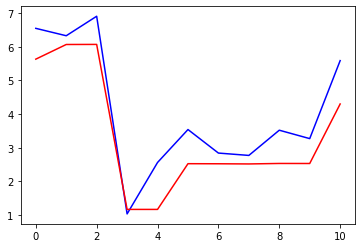

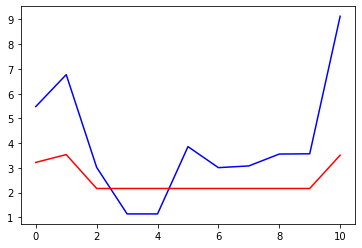

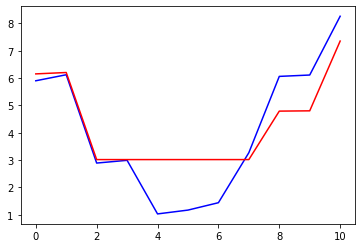

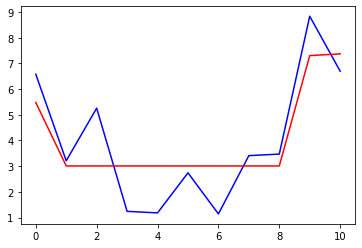

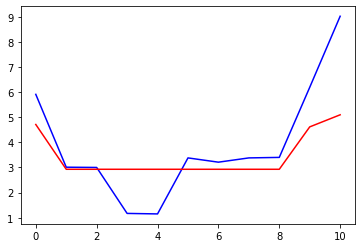

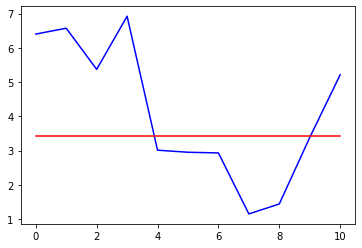

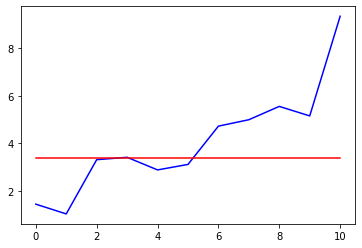

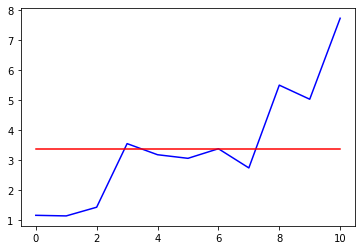

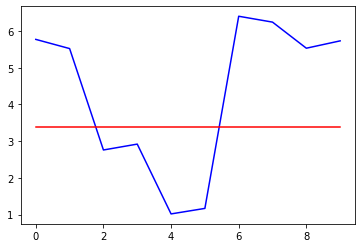

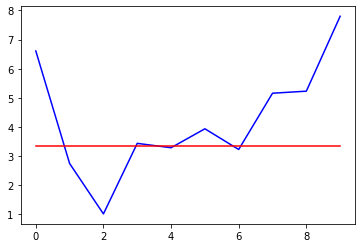

In [37]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=21, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1 
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_3

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               5632      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 23,193
Trainable params: 23,193
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(9

Epoch 46/100
 - 0s - loss: 2.7364 - mae: 2.7364
Epoch 47/100
 - 0s - loss: 2.7315 - mae: 2.7315
Epoch 48/100
 - 0s - loss: 2.7261 - mae: 2.7261
Epoch 49/100
 - 0s - loss: 2.7209 - mae: 2.7209
Epoch 50/100
 - 0s - loss: 2.7154 - mae: 2.7154
Epoch 51/100
 - 0s - loss: 2.7104 - mae: 2.7104
Epoch 52/100
 - 0s - loss: 2.7050 - mae: 2.7050
Epoch 53/100
 - 0s - loss: 2.6996 - mae: 2.6996
Epoch 54/100
 - 0s - loss: 2.6941 - mae: 2.6941
Epoch 55/100
 - 0s - loss: 2.6886 - mae: 2.6886
Epoch 56/100
 - 0s - loss: 2.6837 - mae: 2.6837
Epoch 57/100
 - 0s - loss: 2.6790 - mae: 2.6790
Epoch 58/100
 - 0s - loss: 2.6748 - mae: 2.6748
Epoch 59/100
 - 0s - loss: 2.6707 - mae: 2.6707
Epoch 60/100
 - 0s - loss: 2.6663 - mae: 2.6663
Epoch 61/100
 - 0s - loss: 2.6620 - mae: 2.6620
Epoch 62/100
 - 0s - loss: 2.6576 - mae: 2.6576
Epoch 63/100
 - 0s - loss: 2.6536 - mae: 2.6536
Epoch 64/100
 - 0s - loss: 2.6491 - mae: 2.6491
Epoch 65/100
 - 0s - loss: 2.6452 - mae: 2.6452
Epoch 66/100
 - 0s - loss: 2.6408 - mae:

Epoch 14/100
 - 0s - loss: 1.8808 - mae: 1.8808
Epoch 15/100
 - 0s - loss: 1.8759 - mae: 1.8759
Epoch 16/100
 - 0s - loss: 1.8704 - mae: 1.8704
Epoch 17/100
 - 0s - loss: 1.8654 - mae: 1.8654
Epoch 18/100
 - 0s - loss: 1.8603 - mae: 1.8603
Epoch 19/100
 - 0s - loss: 1.8558 - mae: 1.8558
Epoch 20/100
 - 0s - loss: 1.8513 - mae: 1.8513
Epoch 21/100
 - 0s - loss: 1.8476 - mae: 1.8476
Epoch 22/100
 - 0s - loss: 1.8432 - mae: 1.8432
Epoch 23/100
 - 0s - loss: 1.8394 - mae: 1.8394
Epoch 24/100
 - 0s - loss: 1.8357 - mae: 1.8357
Epoch 25/100
 - 0s - loss: 1.8313 - mae: 1.8313
Epoch 26/100
 - 0s - loss: 1.8278 - mae: 1.8278
Epoch 27/100
 - 0s - loss: 1.8237 - mae: 1.8237
Epoch 28/100
 - 0s - loss: 1.8193 - mae: 1.8193
Epoch 29/100
 - 0s - loss: 1.8158 - mae: 1.8158
Epoch 30/100
 - 0s - loss: 1.8124 - mae: 1.8124
Epoch 31/100
 - 0s - loss: 1.8079 - mae: 1.8079
Epoch 32/100
 - 0s - loss: 1.8044 - mae: 1.8044
Epoch 33/100
 - 0s - loss: 1.8008 - mae: 1.8008
Epoch 34/100
 - 0s - loss: 1.7969 - mae:

Epoch 83/100
 - 0s - loss: 1.7241 - mae: 1.7241
Epoch 84/100
 - 0s - loss: 1.7240 - mae: 1.7240
Epoch 85/100
 - 0s - loss: 1.7238 - mae: 1.7238
Epoch 86/100
 - 0s - loss: 1.7237 - mae: 1.7237
Epoch 87/100
 - 0s - loss: 1.7236 - mae: 1.7236
Epoch 88/100
 - 0s - loss: 1.7235 - mae: 1.7235
Epoch 89/100
 - 0s - loss: 1.7234 - mae: 1.7234
Epoch 90/100
 - 0s - loss: 1.7233 - mae: 1.7233
Epoch 91/100
 - 0s - loss: 1.7231 - mae: 1.7231
Epoch 92/100
 - 0s - loss: 1.7231 - mae: 1.7231
Epoch 93/100
 - 0s - loss: 1.7230 - mae: 1.7230
Epoch 94/100
 - 0s - loss: 1.7229 - mae: 1.7229
Epoch 95/100
 - 0s - loss: 1.7228 - mae: 1.7228
Epoch 96/100
 - 0s - loss: 1.7227 - mae: 1.7227
Epoch 97/100
 - 0s - loss: 1.7228 - mae: 1.7228
Epoch 98/100
 - 0s - loss: 1.7226 - mae: 1.7226
Epoch 99/100
 - 0s - loss: 1.7225 - mae: 1.7225
Epoch 100/100
 - 0s - loss: 1.7225 - mae: 1.7225
*******************Fold number************************:  6
(97, 21) (11, 21) (97,) (11,)
Epoch 1/100
 - 0s - loss: 1.6956 - mae: 1.6956

Epoch 51/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 52/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 53/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 54/100
 - 0s - loss: 1.7061 - mae: 1.7061
Epoch 55/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 56/100
 - 0s - loss: 1.7061 - mae: 1.7061
Epoch 57/100
 - 0s - loss: 1.7061 - mae: 1.7061
Epoch 58/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 59/100
 - 0s - loss: 1.7061 - mae: 1.7061
Epoch 60/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 61/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 62/100
 - 0s - loss: 1.7061 - mae: 1.7061
Epoch 63/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 64/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 65/100
 - 0s - loss: 1.7062 - mae: 1.7062
Epoch 66/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 67/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 68/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 69/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 70/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 71/100
 - 0s - loss: 1.7060 - mae:

Epoch 19/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 20/100
 - 0s - loss: 1.6628 - mae: 1.6628
Epoch 21/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 22/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 23/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 24/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 25/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 26/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 27/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 28/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 29/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 30/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 31/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 32/100
 - 0s - loss: 1.6629 - mae: 1.6629
Epoch 33/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 34/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 35/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 36/100
 - 0s - loss: 1.6629 - mae: 1.6629
Epoch 37/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 38/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 39/100
 - 0s - loss: 1.6627 - mae:

Epoch 88/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 89/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 90/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 91/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 92/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 93/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 94/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 95/100
 - 0s - loss: 1.7182 - mae: 1.7182
Epoch 96/100
 - 0s - loss: 1.7182 - mae: 1.7182
Epoch 97/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 98/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 99/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 100/100
 - 0s - loss: 1.7181 - mae: 1.7181
MSE for 10 folds
 [12.996426366305622, 9.958555053371724, 7.821790553317516, 6.583593155991694, 5.103227941044201, 4.370614872642425, 5.200297901276072, 3.676959581385504, 4.861587494827825, 4.274052050012766]

R2 scores for 10 folds
 [-2.804147419732868, -0.9660041256541385, -0.4110323080955878, -0.1048809866836915, -0.05157295722893518, -0.13497028805765843, -0.102062142

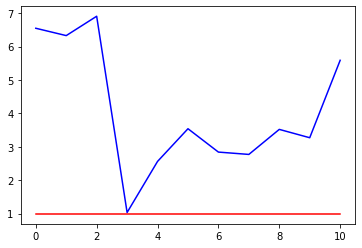

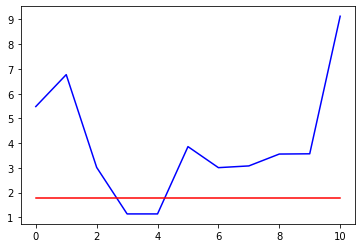

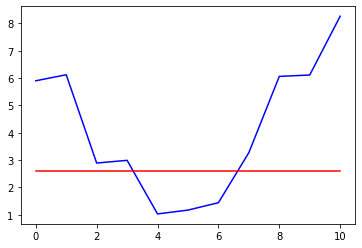

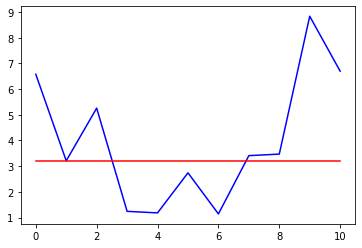

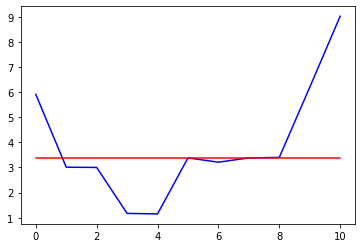

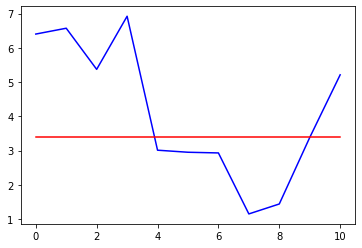

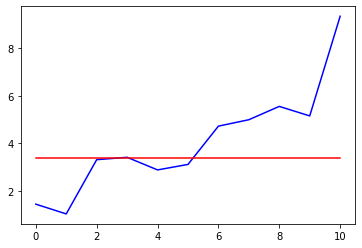

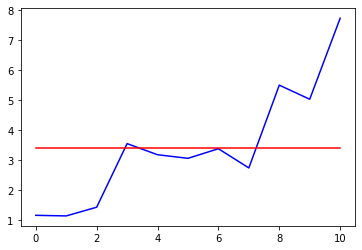

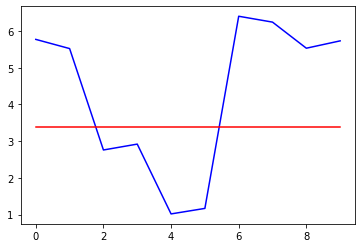

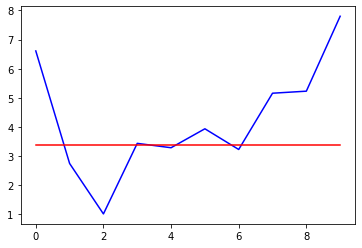

In [38]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=21, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(4,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 

# DNN_4

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               11264     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 3         
Total params: 81,341
Trainable params: 81,341
Non-trainable params: 0
__________________________________________________

 - 0s - loss: 2.7479 - mae: 2.7479
Epoch 44/100
 - 0s - loss: 2.7426 - mae: 2.7426
Epoch 45/100
 - 0s - loss: 2.7374 - mae: 2.7374
Epoch 46/100
 - 0s - loss: 2.7323 - mae: 2.7323
Epoch 47/100
 - 0s - loss: 2.7269 - mae: 2.7269
Epoch 48/100
 - 0s - loss: 2.7218 - mae: 2.7218
Epoch 49/100
 - 0s - loss: 2.7164 - mae: 2.7164
Epoch 50/100
 - 0s - loss: 2.7112 - mae: 2.7112
Epoch 51/100
 - 0s - loss: 2.7058 - mae: 2.7058
Epoch 52/100
 - 0s - loss: 2.7007 - mae: 2.7007
Epoch 53/100
 - 0s - loss: 2.6955 - mae: 2.6955
Epoch 54/100
 - 0s - loss: 2.6902 - mae: 2.6902
Epoch 55/100
 - 0s - loss: 2.6845 - mae: 2.6845
Epoch 56/100
 - 0s - loss: 2.6801 - mae: 2.6801
Epoch 57/100
 - 0s - loss: 2.6758 - mae: 2.6758
Epoch 58/100
 - 0s - loss: 2.6715 - mae: 2.6715
Epoch 59/100
 - 0s - loss: 2.6673 - mae: 2.6673
Epoch 60/100
 - 0s - loss: 2.6633 - mae: 2.6633
Epoch 61/100
 - 0s - loss: 2.6589 - mae: 2.6589
Epoch 62/100
 - 0s - loss: 2.6545 - mae: 2.6545
Epoch 63/100
 - 0s - loss: 2.6506 - mae: 2.6506
Epoch

Epoch 11/100
 - 0s - loss: 1.8945 - mae: 1.8945
Epoch 12/100
 - 0s - loss: 1.8893 - mae: 1.8893
Epoch 13/100
 - 0s - loss: 1.8841 - mae: 1.8841
Epoch 14/100
 - 0s - loss: 1.8789 - mae: 1.8789
Epoch 15/100
 - 0s - loss: 1.8736 - mae: 1.8736
Epoch 16/100
 - 0s - loss: 1.8684 - mae: 1.8684
Epoch 17/100
 - 0s - loss: 1.8629 - mae: 1.8629
Epoch 18/100
 - 0s - loss: 1.8581 - mae: 1.8581
Epoch 19/100
 - 0s - loss: 1.8539 - mae: 1.8539
Epoch 20/100
 - 0s - loss: 1.8492 - mae: 1.8492
Epoch 21/100
 - 0s - loss: 1.8455 - mae: 1.8455
Epoch 22/100
 - 0s - loss: 1.8414 - mae: 1.8414
Epoch 23/100
 - 0s - loss: 1.8376 - mae: 1.8376
Epoch 24/100
 - 0s - loss: 1.8337 - mae: 1.8337
Epoch 25/100
 - 0s - loss: 1.8297 - mae: 1.8297
Epoch 26/100
 - 0s - loss: 1.8257 - mae: 1.8257
Epoch 27/100
 - 0s - loss: 1.8219 - mae: 1.8219
Epoch 28/100
 - 0s - loss: 1.8180 - mae: 1.8180
Epoch 29/100
 - 0s - loss: 1.8140 - mae: 1.8140
Epoch 30/100
 - 0s - loss: 1.8103 - mae: 1.8103
Epoch 31/100
 - 0s - loss: 1.8069 - mae:

Epoch 80/100
 - 0s - loss: 1.7244 - mae: 1.7244
Epoch 81/100
 - 0s - loss: 1.7243 - mae: 1.7243
Epoch 82/100
 - 0s - loss: 1.7243 - mae: 1.7243
Epoch 83/100
 - 0s - loss: 1.7241 - mae: 1.7241
Epoch 84/100
 - 0s - loss: 1.7240 - mae: 1.7240
Epoch 85/100
 - 0s - loss: 1.7240 - mae: 1.7240
Epoch 86/100
 - 0s - loss: 1.7237 - mae: 1.7237
Epoch 87/100
 - 0s - loss: 1.7236 - mae: 1.7236
Epoch 88/100
 - 0s - loss: 1.7236 - mae: 1.7236
Epoch 89/100
 - 0s - loss: 1.7234 - mae: 1.7234
Epoch 90/100
 - 0s - loss: 1.7233 - mae: 1.7233
Epoch 91/100
 - 0s - loss: 1.7231 - mae: 1.7231
Epoch 92/100
 - 0s - loss: 1.7231 - mae: 1.7231
Epoch 93/100
 - 0s - loss: 1.7230 - mae: 1.7230
Epoch 94/100
 - 0s - loss: 1.7229 - mae: 1.7229
Epoch 95/100
 - 0s - loss: 1.7228 - mae: 1.7228
Epoch 96/100
 - 0s - loss: 1.7228 - mae: 1.7228
Epoch 97/100
 - 0s - loss: 1.7227 - mae: 1.7227
Epoch 98/100
 - 0s - loss: 1.7228 - mae: 1.7228
Epoch 99/100
 - 0s - loss: 1.7227 - mae: 1.7227
Epoch 100/100
 - 0s - loss: 1.7226 - mae

Epoch 48/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 49/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 50/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 51/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 52/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 53/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 54/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 55/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 56/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 57/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 58/100
 - 0s - loss: 1.7062 - mae: 1.7062
Epoch 59/100
 - 0s - loss: 1.7061 - mae: 1.7061
Epoch 60/100
 - 0s - loss: 1.7061 - mae: 1.7061
Epoch 61/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 62/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 63/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 64/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 65/100
 - 0s - loss: 1.7060 - mae: 1.7060
Epoch 66/100
 - 0s - loss: 1.7061 - mae: 1.7061
Epoch 67/100
 - 0s - loss: 1.7062 - mae: 1.7062
Epoch 68/100
 - 0s - loss: 1.7060 - mae:

Epoch 16/100
 - 0s - loss: 1.6628 - mae: 1.6628
Epoch 17/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 18/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 19/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 20/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 21/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 22/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 23/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 24/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 25/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 26/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 27/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 28/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 29/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 30/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 31/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 32/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 33/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 34/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 35/100
 - 0s - loss: 1.6627 - mae: 1.6627
Epoch 36/100
 - 0s - loss: 1.6627 - mae:

Epoch 85/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 86/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 87/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 88/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 89/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 90/100
 - 0s - loss: 1.7183 - mae: 1.7183
Epoch 91/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 92/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 93/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 94/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 95/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 96/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 97/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 98/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 99/100
 - 0s - loss: 1.7181 - mae: 1.7181
Epoch 100/100
 - 0s - loss: 1.7181 - mae: 1.7181
MSE for 10 folds
 [12.919385115957327, 9.940869595884784, 7.8124007937195445, 6.579961562685846, 5.104097980993196, 4.369022719036978, 5.200701037335109, 3.6767405451649426, 4.8627974926175295, 4.271256744113844]

R2 scores for 10 

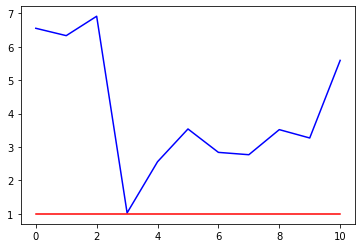

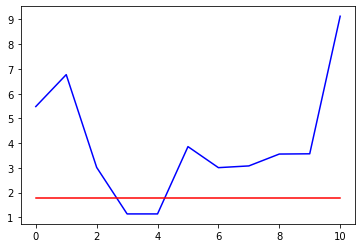

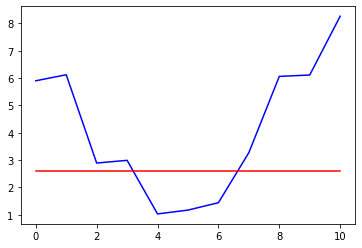

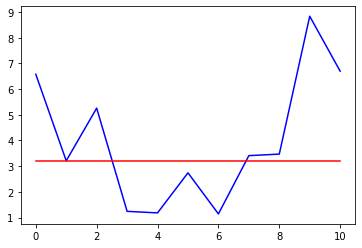

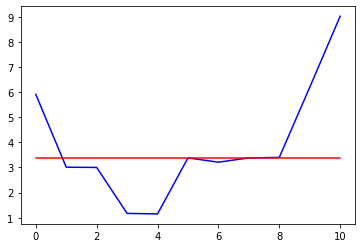

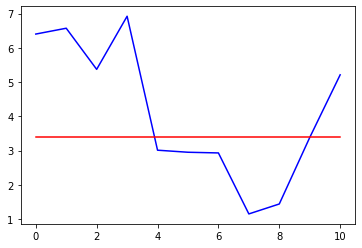

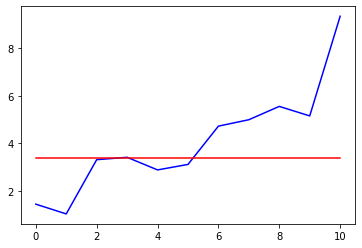

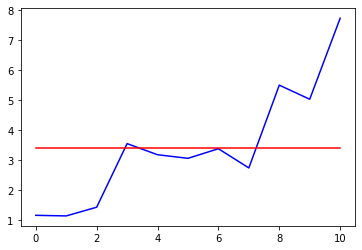

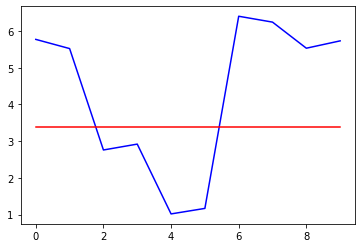

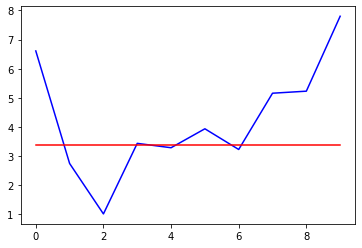

In [39]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=21, activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(2,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 